In [4]:
## HW 2 DATA 445 Due 2021-09-17

In [5]:
## Q1 Given 1000 records in a dataset, 1000 models are trained with 999 records as part of the training sample 
## and the remaining 1 sample for testing, and the error rate is averaged out, this validation technique is called

## (c) Leave One Out Cross Validation (LOOCV)

In [6]:
## Q2 In k-fold cross validation technique, the value of k being small could lead to which of the following
## in relation to the error rate

## (c) high bias and low variance
## because only 2 groups of data points, have about half in each

In [7]:
## Q3 In k-fold cross validation technique, the value of k being large could lead to which of the following
## in relation to the error rate

## (b) low bias and high variance
## because as the k approaches the number of data points it becomes LOOCV

In [8]:
## Q4 Explain what regularization is and why it is useful.

## Regularization is the shrinkage of the number of variables in a model. It is useful as reducing the number
## of variables reduces the computational cost of a model. It also makes the model easier to understand and/or
## explain to stakeholders.

In [9]:
## Q5 Consider the framingham.csv data file. The dataset is publically available on the Kaggle web- site, 
## and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
## The classification goal is to predict whether the patient has 10-year risk of future coronary heart 
## disease (CHD). The dataset provides the patients? information. It includes over 4,000 records 
## and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral 
## and medical risk factors.

In [10]:
## Q5a Using the pandas library, read the csv data file and create a data-frame called heart.

import boto3
import pandas as pd

## setting up the S3 bucket
s3 = boto3.resource('s3')
bucket_name = 'bonnieh-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
heart = pd.read_csv(file_content_stream)
heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [11]:
## Q5b Remove observations with missing values.

heart = heart.dropna()
heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [48]:
## Q5c Perform a 5-folds cross validation with the goal of measuring the performance, in terms of F1-score,
## of two competing models: Using age, currentSmoker, totChol, sysBP, diaBP, BMI, heartRate, and glucose 
## as the predictor variables, and TenYearCHD as the target variable build a logistic regression model 
## under the 5-folds cross validation framework. Compute and store the F1-score for each iteration. 

## Then using age, currentSmoker, totChol, BMI, heartRate, and glucose as the 
## predictor variables, and TenYearCHD as the target variable build a logistic regression model under the 
## 5-folds cross validation framework. Compute and store the F1-score for each iteration.

## Use 25% as threshold to change the likelihoods to labels. Make sure to scale the input variables of 
## both models to 0-1 range (see MinMaxScaler) before you run the 5-fold cross validation framework. 
## Also, you can use the f1 score function to compute the F1-score.

## importing the necessary libraries

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

## scaling the input variables to a 0-1 scale
scaler = MinMaxScaler()
heart_scaled = pd.DataFrame(scaler.fit_transform(heart), index = heart.index, columns = heart.columns)
heart_scaled  

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,0.684211,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.151951,0.271868,0.349206,0.228308,0.363636,0.115819,0.0
4232,1.0,0.947368,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169,1.0
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944,1.0
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096,0.0


In [49]:
## defining the input and target variables for model 1
X1 = heart_scaled[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
Y1 = heart_scaled['TenYearCHD']

## defining the lists to store the results
md1_f1scores =[]
md2_f1scores =[]

## create the folds and check the number of folds
kfold = KFold(n_splits = 5, shuffle = True)
kfold.get_n_splits(X1)

5

In [50]:
## splitting data, creating 2nd train/test data, fitting the models, & running the predictions

for train_ix, test_ix in kfold.split(X1):
    
    ## splitting the data into train and validation
    X1_train, X1_val = X1.iloc[train_ix], X1.iloc[test_ix]
    Y1_train, Y1_val = Y1.iloc[train_ix], Y1.iloc[test_ix]
    
    ## dropping the bp values to create the model 2 train/validate data
    X2_train = X1_train.drop(columns =['sysBP', 'diaBP'], axis = 1)
    X2_val = X1_val.drop(columns =['sysBP', 'diaBP'], axis = 1)
    Y2_train = Y1_train
    Y2_val = Y1_val
    
    ## fitting the logistic regression model
    logit_md1 = LogisticRegression().fit(X1_train, Y1_train)
    logit_md2 = LogisticRegression().fit(X2_train, Y2_train)
    
    ## predicting on validation set
    preds1 = logit_md1.predict_proba(X1_val)[:, 1]
    preds2 = logit_md2.predict_proba(X2_val)[:, 1]
        
    ## setting 25% threshold 
    preds1 = np.where(preds1<0.25, 0, 1)
    preds2 = np.where(preds2<0.25, 0, 1)

    ## calculating F1 for each iteration
    md1_f1 = f1_score(Y1_val, preds1)
    md2_f1 = f1_score(Y2_val, preds2)
    
    ## storing the F1 results
    md1_f1scores.append(md1_f1)
    md2_f1scores.append(md2_f1)

In [51]:
## calculating the average F1 score for each model

md1_avg_f1 = np.mean(md1_f1scores)
md2_avg_f1 = np.mean(md2_f1scores)

print ('model 1 average F1 score =', md1_avg_f1, 'and model 2 average F1 score =', md2_avg_f1)

## based on the F1 scores, model 1 is better as it has a slightly higher average F1 score. But when I re-ran
## the k-fold splits multiple times, they were always very close. See additional explanation below with graph.

model 1 average F1 score = 0.33458139774317697 and model 2 average F1 score = 0.3197039465941953


(0.0, 0.5)

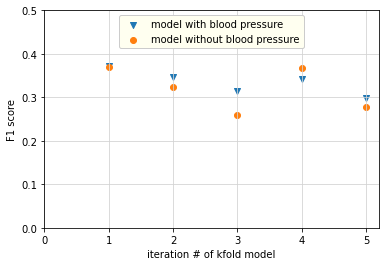

In [81]:
## plotting the F1 scores for each round with each model

plt.scatter(range(1,6), md1_f1scores, label = 'model with blood pressure', marker='v')
plt.scatter(range(1,6), md2_f1scores, label = 'model without blood pressure')
plt.xlabel('iteration # of kfold model')
plt.ylabel('F1 score')
plt.legend(loc='upper center', framealpha = 1, facecolor = 'ivory')
plt.grid(color='lightgrey')
plt.xticks(np.arange(0, 6, 1))
plt.ylim(0,0.5)

## a plot of the F1 scores shows the same conclusion as the average F1 score calculation--that the model with the 
## blood pressure values included has a slightly higher F1 value. However, this makes a model with 8 variables versus 
## one with only 6. If computational cost is a concern or presenting a simpler model is desired, the F1 values are 
## close enough to use the 6 variable model instead. When code was run multiple times, they were often indistinguishably 
## close. I would discuss with stakeholders the value of a simpler model both in terms of cost and explainability.